<a href="https://colab.research.google.com/github/liady/dl-ydata/blob/master/assignment1_Liad_Yosef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Theoretical Aspects - Assignment 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


If our network can be represented as $out = f_n\circ f_{n-1}\circ ...\circ f_1 \circ f_0 (input)$ where all $f_k$ are linear, then they can be represented as matrices $T_n$, and so we can define $T = \prod T_n  $ and $output = T \cdot input$

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

$f'(t) = -e^{-t}*\frac{-1}{(1+e^{-t})^2} = \frac{e^{-t}}{(1+e^{-t})^2}= \frac{1}{1+e^{-t}} * (1-\frac{1}{1+e^{-t}})$ 

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

$f'(x) = \left\{
	\begin{array}{ll}
		1  & \mbox{if } x > 0 \\
		0 & \mbox{if } x \leq 0
	\end{array}
\right.$

3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations:

```
z = x1 + 5*x2 - 3*x3^2
```

$
\frac{\delta z}{\delta x_1} = 1\\
\frac{\delta z}{\delta x_2} = 5\\
\frac{\delta z}{\delta x_3} = -6x_3\\
$

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

$
\frac{\delta z}{\delta x_1} = (x_2 - 4)\\
\frac{\delta z}{\delta x_2} = x_1\\
\frac{\delta z}{\delta x_3} = \frac{2*x_3*e^(x_3 ^2)}{5*x_4^2}\\
\frac{\delta z}{\delta x_4} = -1*\frac{e^(x_3^2)}{(5*x_4^2)^2}*10*x_4
$

```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

k1 = Takes only the middle pixel

k2 = Takes only the "middle" pixel - but shifted to the right

k3 = Enhanches the middle pixel (and decreases the others)

k4 = Averages the pixels - blurs

#### Apply to arrays
Apply the convolutions above to the following array:


In [0]:
x = np.array([
       [-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [0]:
def conv(input, kernel):
  x = input.shape[0] - (kernel.shape[0] - 1)
  y = input.shape[1] - (kernel.shape[1] - 1)
  ret = np.zeros([x, y])
  for i in range(x):
    for j in range(y):
      sliced = input[i:i + kernel.shape[0], j: j + kernel.shape[1]]
      ret[i][j] = np.sum(sliced*kernel)
  return ret

x1 = conv(x, np.array( [ [0, 0, 0], [0, 1, 0], [0, 0, 0] ]))
x2 = conv(x, np.array( [ [0, 0, 0], [0, 0, 1], [0, 0, 0] ]))
x3 = conv(x, np.array( [ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ]))
x4 = conv(x, np.divide(np.array( [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]), 9))

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

1. (3, 3)

2. (1, 1)

3. (5, 5)

4. (3, 3)

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

In [0]:
X = input.shape[0] + padding[0] - (kernel.shape[0] -1 + 2 * (stride[0] - 1))
Y = input.shape[1] + padding[1] - (kernel.shape[1] -1 + 2 * (stride[1] - 1))

#### Apply to images
Apply the convolution filters above on the image. Plot the results:

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


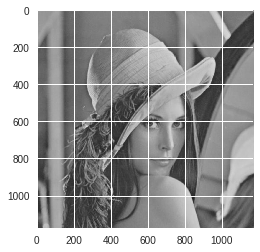

In [29]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('/content/gdrive/My Drive/Colab Notebooks/lena.jpg')
plt.imshow(im)

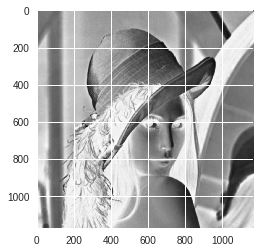

In [39]:
x1 = conv(im, np.array( [ [0, 0, 0], [0, 1, 0], [0, 0, 0] ]))
plt.imshow(x1)
x2 = conv(im, np.array( [ [0, 0, 0], [0, 0, 1], [0, 0, 0] ]))
plt.imshow(x2)
x3 = conv(im, np.array( [ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ]))
plt.imshow(x3)
x4 = conv(im, np.divide(np.array( [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]), 9))
plt.imshow(x4)

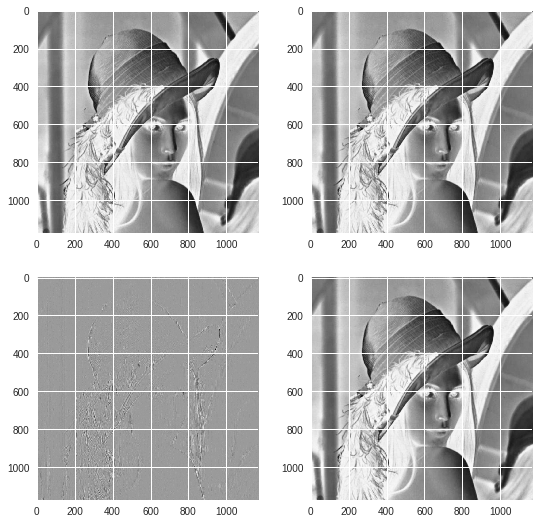

In [43]:
fig=plt.figure(figsize=(9, 9))
fig.add_subplot(2, 2, 1)
plt.imshow(x1)
fig.add_subplot(2, 2, 2)
plt.imshow(x2)
fig.add_subplot(2, 2, 3)
plt.imshow(x3)
fig.add_subplot(2, 2, 4)
plt.imshow(x4)
plt.show()

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


Conv #1: 24 \* 24 * 32

Pool #1: 24 \* 24

Conv #2: 20 \* 20 * 64

Pool #2: 20 \* 20

Dense #1: 400 * 1024

Dense #2 : 1024 * 10

### Learning in biological neurons
Try to come up with a learning algorithm for a neural network that replaces back propagation, and mimicks the operation of biological neurons.

The neurons can be organized in a graph, instead of layers (as in the brain)

### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

In [0]:
# Write your answer here

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [59]:
def grad(fn, point):
  epsilon = 100
  for i in range(1, 50):
    epsilon /=2
    print((fn(point + epsilon) - fn(point - epsilon)) / (2 * epsilon))

    
def func(x):
  return x*x*x + x*x + 5*x

def deriv(x):
  return 3*x*x + 2*x + 5

grad(func, 14)
print(deriv(14))

3121.0
1246.0
777.25
660.0625
630.765625
623.44140625
621.6103515625
621.152587890625
621.0381469726562
621.0095367431641
621.002384185791
621.0005960464478
621.0001490116119
621.000037252903
621.0000093132257
621.0000023281574
621.0000005823374
621.0000001454354
621.0000000357628
621.0000000095367
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
621.0
620.96
620.96
621.12
621.44
620.8
622.08
621
